# <font size="10">MAJOR PROJECT</font>

# Loading Dataset From CSV File

In [46]:
# Importing pandas for performing operations on dataset
import pandas as pd

# Importing dataset which is in the form of a CSV File.
data = pd.read_csv('odi.csv')

# Importing prediction data for later use.
data_predict = pd.read_csv('odi_predict.csv')

# Using Group-by Function to Group Data According to Each Country to Find Mean of Runs Scored by Each Country

In [47]:
# Grouping data according to country
data_grouped = data.groupby('bat_team')

# Finding mean of all columns
data_grouped_mean = data_grouped.mean()

# Finding mean runs
data_grouped_mean['runs']

bat_team
Afghanistan             103.719725
Asia XI                 150.514989
Australia               122.956547
Bangladesh              105.383375
Bermuda                  86.493213
Canada                   94.619701
England                 120.585727
Hong Kong               100.560976
India                   125.675789
Ireland                 103.182362
Kenya                    84.564852
Netherlands              92.863177
New Zealand             118.863359
Pakistan                114.268115
Papua New Guinea        110.830986
Scotland                102.031166
South Africa            124.920405
Sri Lanka               116.667119
United Arab Emirates    103.675474
West Indies             103.824277
Zimbabwe                 93.753860
Name: runs, dtype: float64

# Plotting a Bar Graph For Average Runs For Each Country

In [48]:
# Importing necessary packages for Visual Representation of Data
import matplotlib.pyplot as plt
import seaborn as sns

### Bar Graph

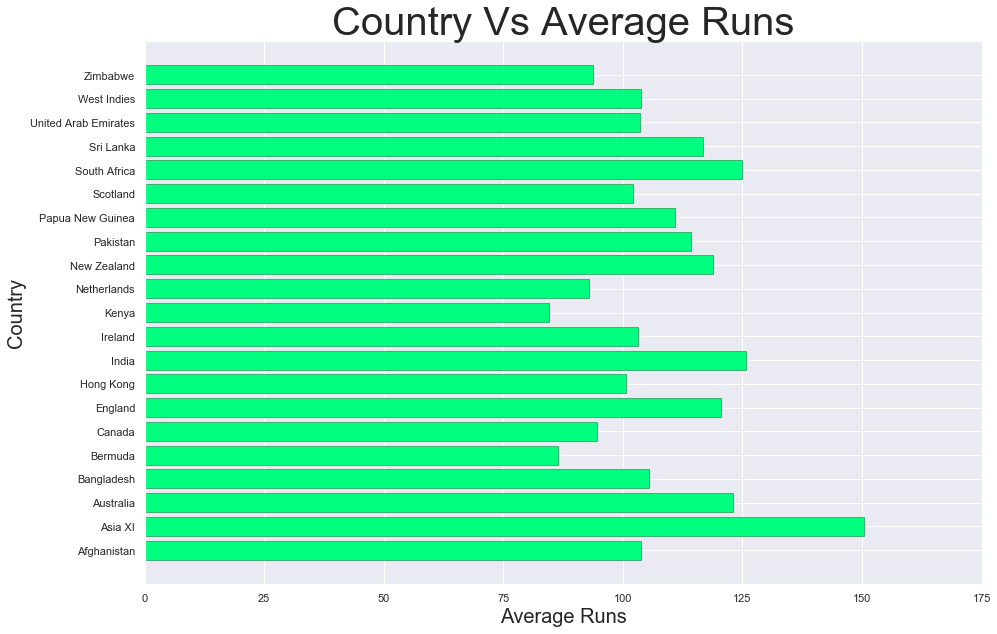

In [49]:
sns.set()
plt.barh(data_grouped_mean.index, data_grouped_mean['runs'], color='springgreen', edgecolor='mediumseagreen', linewidth=1)
plt.rcParams['figure.figsize']=(15,10)
plt.title('Country Vs Average Runs', fontsize = 40)
plt.xlabel('Average Runs', fontsize = 20)
plt.xticks([0,25,50,75,100,125,150,175])
plt.ylabel('Country', fontsize = 20)
plt.rc('xtick', labelsize=40)
plt.rc('ytick', labelsize=40)
plt.show()

# Handling Missing Values

In [50]:
# Finding information about each column of the dataset
data.info()
# Since there are no null values we can move ahead

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
mid               350899 non-null int64
date              350899 non-null object
venue             350899 non-null object
bat_team          350899 non-null object
bowl_team         350899 non-null object
batsman           350899 non-null object
bowler            350899 non-null object
runs              350899 non-null int64
wickets           350899 non-null int64
overs             350899 non-null float64
runs_last_5       350899 non-null int64
wickets_last_5    350899 non-null int64
striker           350899 non-null int64
non-striker       350899 non-null int64
total             350899 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


# Converting Categorical Columns to Numeric Using Label Encoder

In [51]:
# Importing LabelEncoder to convert categorical columns to numeric
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(data['venue'])
data['venue'] = labelEncoder.transform(data['venue'])
data_predict['venue'] = labelEncoder.transform(data_predict['venue'])
labelEncoder.fit(data['bat_team'])
data['bat_team'] = labelEncoder.transform(data['bat_team'])
data_predict['bat_team'] = labelEncoder.transform(data_predict['bat_team'])
labelEncoder.fit(data['bowl_team'])
data['bowl_team'] = labelEncoder.transform(data['bowl_team'])
data_predict['bowl_team'] = labelEncoder.transform(data_predict['bowl_team'])
labelEncoder.fit(data['batsman'])
data['batsman'] = labelEncoder.transform(data['batsman'])
data_predict['batsman'] = labelEncoder.transform(data_predict['batsman'])
labelEncoder.fit(data['bowler'])
data['bowler'] = labelEncoder.transform(data['bowler'])
data_predict['bowler'] = labelEncoder.transform(data_predict['bowler'])

In [57]:
# Importing datetime and converting date column to ordinal form
import datetime as dt
data.loc[:,'date'] = pd.to_datetime(data['date'])
data_predict.loc[:,'date'] = pd.to_datetime(data_predict['date'])
data.loc[:,'date'] = data['date'].map(dt.datetime.toordinal)
data_predict.loc[:,'date'] = data_predict['date'].map(dt.datetime.toordinal)

# Selecting 'total' Column as The Target Variable

In [58]:
y = data['total']

# Selecting Remaining Columns as Feature Variables

In [59]:
X = data.drop(['total'], axis = 1)

# Performing Train-Test Split

In [60]:
# Implementing Train-test split
from sklearn.model_selection import train_test_split

# We perform hyperparameter tuning during Train-test split and choose the optimum values to provide maximum accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 174)

# Implementing Different Predictive Models And Finding Their Accuracies

### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
# Instantiation
linreg = LinearRegression()
        
# Fitting the model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Accuracy When Using Linear Regression

In [62]:
accuracy = linreg.score(X_test, y_test) * 100
print("Accuracy of the model while using Linear Regression is " + str(accuracy) + " %")

Accuracy of the model while using Linear Regression is 54.11291307125388 %


### Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
# Instantiation
dec = DecisionTreeRegressor()

# Fitting the model
dec.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Accuracy When Using Decision Tree Regressor

In [64]:
accuracy = dec.score(X_test, y_test) * 100
print("Accuracy of the model while using Decision Tree Regressor is " + str(accuracy) + " %")

Accuracy of the model while using Decision Tree Regressor is 97.04596833024704 %


### Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
# Instantiation
random = RandomForestRegressor()

# Fitting the model
random.fit(X_train, y_train)

C:\Users\Md Ilmul Hoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Accuracy When Using Random Forest Regressor

In [66]:
accuracy = random.score(X_test, y_test) * 100
print("Accuracy of the model while using Random Forest Regressor is " + str(accuracy) + " %")

Accuracy of the model while using Random Forest Regressor is 98.7001412417141 %


# Time to Predict !!!

In [67]:
# Applying prediction of Linear Regression Model
linreg.predict(data_predict)

array([199.40374761, 342.71838629])

In [68]:
# Applying prediction of Decision Tree Model
dec.predict(data_predict)

array([220., 303.])

In [69]:
# Applying prediction of Random Forest Model
random.predict(data_predict)

array([220. , 302.1])